Buenas buenas, proyecto de calculito numeriquito por:
Angel De Crescenzo 27.851.257
Regina Escalona 30.681.671

In [ ]:
Como obtenemos los datos es usando una API de datos meteorologicos mundiales usando el
"Location" como una variable String que es colocando el nombre de una ciudad en INGLES

"Start_date" fecha inicio del rango
"End_date" fecha de fin del rango

url es donde se va a llamar a la api en la web y colocando las variables en sus respectivos lugares
en la direccion usando por ejemplo "$(location)"

la api da un archivo JSON para leer todo en String, al leerlo solo buscamos una variable
que es la temperatura media y de una vez lo pasamos a un float de 64

In [20]:
using HTTP
using JSON

location = "Schweinfurt"

start_date = "2023-01-20"
end_date = "2023-01-26" 

url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx?q=$(location)&tp=24&date=$(start_date)&enddate=$(end_date)&format=json&key=790e4819ffc841c5b1810355241106"

response = HTTP.request("GET", url)

if response.status == 200
    data = JSON.parse(String(response.body))
    println("Datos de la semana del $start_date al $end_date de $location obtenidos correctamente")
else
    println("Error al obtener datos de la semana del $start_date al $end_date: $(response.status)")
end

temps_media = []

for day in data["data"]["weather"]
    temp_media = day["avgtempC"]

    push!(temps_media, parse(Float64, temp_media))
end

print(temps_media)


Datos de la semana del 2023-01-20 al 2023-01-26 de Schweinfurt obtenidos correctamente
Any[-1.0, -2.0, -0.0, -0.0, 1.0, -0.0, -0.0]

El panita lagrange, en la funcion lagrange le damos 3 parametros x, y, z, indicando que x es el numero de dias la cual estamos haciendo la interpolacion en forma de lista y la y es la lista de las temperaturas correspondientes a esos dias, en la parte de la variable multiplicacion lo que hacemos es sacar el factor de lagrange


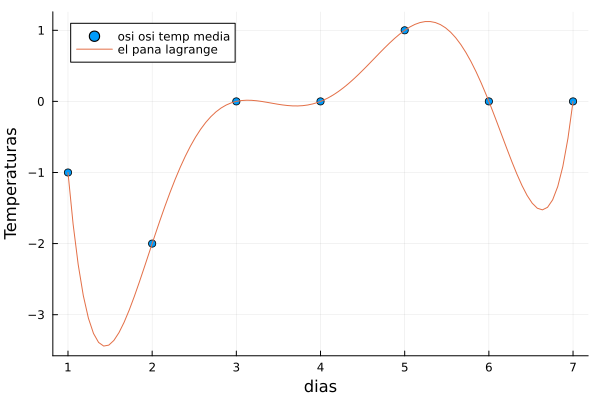

In [22]:
using Plots

y = temps_media
x = [1, 2, 3 , 4, 5, 6, 7]

function lagrange(x, y, z)
    n = length(x)
    total = 0
    for i in 1:n
        multiplicacion = y[i]
        for j in 1:n
            if i !=j
                multiplicacion *= (z - x[j])/ (x[i]-x[j])
            end
        end
        total += multiplicacion
    end
    return total
end
intex = sort(vcat(x, range(minimum(x), stop=maximum(x), length=100)))
intey = [lagrange(x, y, z) for z in intex]

scatter(x, y, label="osi osi temp media")
plot!(intex, intey, label="el pana lagrange", xlabel="dias", ylabel="Temperaturas")

Taylor xdddddddddddd


[-1.0, -1.0552775249580262, -1.1005886151318776, -1.136897772955916, -1.1650816710955445, -1.1859373787449226, -1.2001892994684098, -1.208494820585743, -1.2114486741009438, -3.175541615871853, -2.980718203534908, -2.799836153025453, -2.631524020341382, -2.4745619491864885, -2.3278664077192883, -2.190476015534072, -2.0615384608741736, -1.9402985080774817, -1.8260870952541606, -1.7183115221966112, -1.6164467285216548, -1.520027662044942, -1.428642737387593, -1.3419283848150594, -1.2595646893082177, 0.19084650587515528, 0.1375337705594566, 0.09510708352690093, 0.06216405304693503, 0.03744580159489286, 0.019824700739441994, 0.00829284937018311, 0.0019512952654060973, 0.0, 0.0017285471935179907, 0.006507594098397123, 0.013781066528332898, 0.023059097126808637, 0.03391170697577973, 0.045963230544512276, 0.05888748397857736, 0.07240367672899933, -0.7161109138588323, -0.5841353741567967, -0.4652034750800186, -0.3582385534565282, -0.2622449454132245, -0.17630241132471566, -0.09956085809821573, 

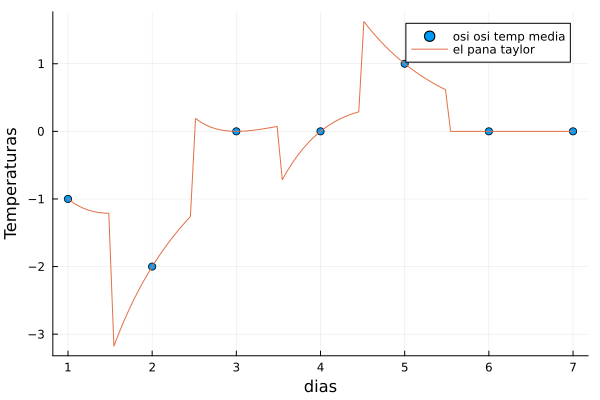

]

In [7]:
using Plots

y = temps_media
x = [1, 2, 3 , 4, 5, 6, 7]

function factorial(n)
    if n == 0
        return 1
    else 
        return n * factorial(n-1)
    end
end

function derivadita(y, z, n)
    #nmro de espacios entre los puntos
    h = 1
    if n == 0
        return y[z]
    elseif z + 1 > length(y)
        return 0
    else
        return (derivadita(y, z + 1, n-1) - derivadita(y, z, n-1))/h
    end
end

function taylor(y, a, z, n)
    # grado del polinomio a 6 pal taylor
    n = min(n, 6)
    suma = 0
    for i in 0:n
        suma += derivadita(y, a, i)/factorial(i)*(z-a)^i
    end
    return suma
end

intex_t = range(minimum(x), stop=maximum(x), length=100)
intey_t = [taylor(y, round(Int, i), i, 6) for i in intex_t]

print(intey_t)
scatter(x, y, label="osi osi temp media")
plot!(intex_t, intey_t, label="el pana taylor", xlabel="dias", ylabel="Temperaturas")

Por trozos

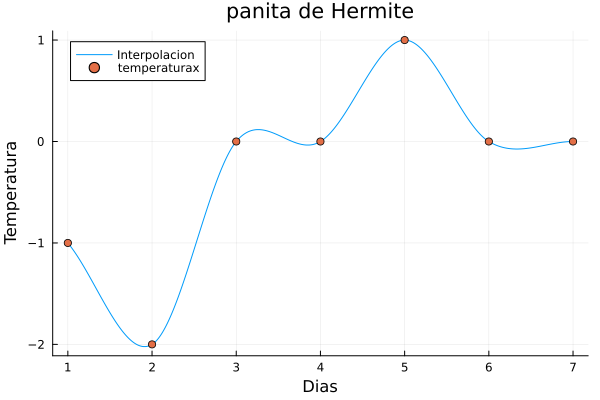

In [34]:
using Plots

y = temps_media
x = [1, 2, 3 , 4, 5, 6, 7]

function derivada(x, y)
    n = length(x)
    dy = zeros(n)

    dy[1] = (y[2] - y[1]) / (x[2] - x[1])
    dy[end] = (y[end] - y[end-1]) / (x[end] - x[end-1])

    for i in 2:n-1
        dy[i] = (y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1])
    end

    return dy
end

function buscarin(x_interp, x1, x2)
    indices = []
    for (i, val) in enumerate(x_interp)
        if x1 <= val <= x2
            push!(indices, i)
        end
    end
    return indices
end

function interpolacionher(x, y, dy, xinter)
    n = length(x)
    yinter = similar(xinter)

    for i in 1:n-1
        h = x[i + 1] - x[i]

        t = (xinter .- x[i]) / h

        h00 = 2 .* t.^3 .- 3 .* t.^2 .+ 1
        h10 = t.^3 .- 2 .* t.^2 .+ t
        h01 = -2 .* t.^3 .+ 3 .* t.^2
        h11 = t.^3 .- t.^2

        idx = buscarin(xinter, x[i], x[i + 1])

        for j in idx
            yinter[j] = h00[j] * y[i] + h10[j] * h * dy[i] + h01[j] * y[i + 1] + h11[j] * h * dy[i + 1]
        end
    end
    return yinter
end


dy = derivada(x, y)

xv = range(minimum(x), stop=maximum(x), length=1000)
yinterh = interpolacionher(x, y, dy, xv)

plot(xv, yinterh, label="Interpolacion")
scatter!(x, y, label="temperaturax")
plot!(title = "panita de Hermite", xlabel = "Dias", ylabel = "Temperatura")
